In [3]:
# import all the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
# read the dataset
df = pd.read_csv('/Users/chalana/Desktop/Model evaluation/KNN with database/data_drowsiness/prepared/totalwithmaininfo.csv',sep=',')
df.head()

,Y,MOE,Participant,EAR,MAR,Circularity,EAR_N,MAR_N,Circularity_N,MOE_N
0,0.0,2.534145,1.0,0.312688,0.792397,0.432896,-0.999551,0.802437,-0.948848,0.877172
1,0.0,2.379947,1.0,0.321940,0.766199,0.486923,-0.000897,0.317858,1.044306,0.211742
2,0.0,2.078550,1.0,0.331216,0.688449,0.456029,1.000448,-1.120295,-0.095458,-1.088914
3,0.0,2.509767,1.0,0.309246,0.776136,0.452655,-1.371052,0.501666,-0.219920,0.771970
4,0.0,3.586821,1.0,0.204691,0.734189,0.361123,-12.657205,-0.274242,-3.596686,5.419921


In [5]:
df

,Y,MOE,Participant,EAR,MAR,Circularity,EAR_N,MAR_N,Circularity_N,MOE_N
0,0.0,2.534145,1.0,0.312688,0.792397,0.432896,-0.999551,0.802437,-0.948848,0.877172
1,0.0,2.379947,1.0,0.321940,0.766199,0.486923,-0.000897,0.317858,1.044306,0.211742
2,0.0,2.078550,1.0,0.331216,0.688449,0.456029,1.000448,-1.120295,-0.095458,-1.088914
3,0.0,2.509767,1.0,0.309246,0.776136,0.452655,-1.371052,0.501666,-0.219920,0.771970
4,0.0,3.586821,1.0,0.204691,0.734189,0.361123,-12.657205,-0.274242,-3.596686,5.419921
...,...,...,...,...,...,...,...,...,...,...
17310,10.0,5.349703,63.0,0.181047,0.968549,0.314714,-0.390345,0.102718,-0.560798,-0.042560
17311,10.0,5.530147,63.0,0.178874,0.989198,0.306021,-0.414919,0.260488,-0.659689,0.014583
17312,10.0,5.536179,63.0,0.180700,1.000386,0.315374,-0.394274,0.345967,-0.553289,0.016493
17313,10.0,5.472988,63.0,0.181437,0.993005,0.321619,-0.385932,0.289576,-0.482247,-0.003518


In [6]:
# let's check what all unique value do we have in the "Participant" column
df['Participant'].unique()

array([ 1.,  2.,  3.,  5., 10., 16., 18., 19., 21., 22., 50., 51., 52.,
       53., 56., 57., 59., 60., 61., 62., 63.])

In [7]:
# let's check what all unique value do we have in the "Y" column
df['Y'].unique()

array([ 0., 10.,  5.])

In [8]:
# let's drop the Participant column as we do not need this
df.drop(["Participant"], axis=1, inplace = True)

In [9]:
# We will drop all the rows where Y == 5 because we are not considering the states with "low vigilant state"
df.drop(df[df.Y == 5].index, inplace=True)

In [10]:
df

,Y,MOE,EAR,MAR,Circularity,EAR_N,MAR_N,Circularity_N,MOE_N
0,0.0,2.534145,0.312688,0.792397,0.432896,-0.999551,0.802437,-0.948848,0.877172
1,0.0,2.379947,0.321940,0.766199,0.486923,-0.000897,0.317858,1.044306,0.211742
2,0.0,2.078550,0.331216,0.688449,0.456029,1.000448,-1.120295,-0.095458,-1.088914
3,0.0,2.509767,0.309246,0.776136,0.452655,-1.371052,0.501666,-0.219920,0.771970
4,0.0,3.586821,0.204691,0.734189,0.361123,-12.657205,-0.274242,-3.596686,5.419921
...,...,...,...,...,...,...,...,...,...
17310,10.0,5.349703,0.181047,0.968549,0.314714,-0.390345,0.102718,-0.560798,-0.042560
17311,10.0,5.530147,0.178874,0.989198,0.306021,-0.414919,0.260488,-0.659689,0.014583
17312,10.0,5.536179,0.180700,1.000386,0.315374,-0.394274,0.345967,-0.553289,0.016493
17313,10.0,5.472988,0.181437,0.993005,0.321619,-0.385932,0.289576,-0.482247,-0.003518


In [11]:
# Set 0.0 of y to int(0) which is set it to awake class
# Set 10.0 of y to int(1) which is set it to drowsy class
df.loc[df.Y == 0.0, "Y"] = int(0)
df.loc[df.Y == 10.0, "Y"] = int(1)

In [12]:
df

,Y,MOE,EAR,MAR,Circularity,EAR_N,MAR_N,Circularity_N,MOE_N
0,0.0,2.534145,0.312688,0.792397,0.432896,-0.999551,0.802437,-0.948848,0.877172
1,0.0,2.379947,0.321940,0.766199,0.486923,-0.000897,0.317858,1.044306,0.211742
2,0.0,2.078550,0.331216,0.688449,0.456029,1.000448,-1.120295,-0.095458,-1.088914
3,0.0,2.509767,0.309246,0.776136,0.452655,-1.371052,0.501666,-0.219920,0.771970
4,0.0,3.586821,0.204691,0.734189,0.361123,-12.657205,-0.274242,-3.596686,5.419921
...,...,...,...,...,...,...,...,...,...
17310,1.0,5.349703,0.181047,0.968549,0.314714,-0.390345,0.102718,-0.560798,-0.042560
17311,1.0,5.530147,0.178874,0.989198,0.306021,-0.414919,0.260488,-0.659689,0.014583
17312,1.0,5.536179,0.180700,1.000386,0.315374,-0.394274,0.345967,-0.553289,0.016493
17313,1.0,5.472988,0.181437,0.993005,0.321619,-0.385932,0.289576,-0.482247,-0.003518


In [13]:
X = df.drop('Y',axis=1).values
y = df['Y'].values

In [14]:
# split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [15]:
# import KNeighbours
from sklearn.neighbors import KNeighborsClassifier

In [16]:
# start with K=1
knn = KNeighborsClassifier(n_neighbors=1)

In [17]:
# fit the model.
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [18]:
#evaluation and prediction
pred = knn.predict(X_test)

In [19]:
#evaluate our KNN model
from sklearn.metrics import classification_report,confusion_matrix

In [20]:
print(confusion_matrix(y_test,pred))

[[1141  184]
 [ 165 1157]]


In [21]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.87      0.86      0.87      1325
         1.0       0.86      0.88      0.87      1322

    accuracy                           0.87      2647
   macro avg       0.87      0.87      0.87      2647
weighted avg       0.87      0.87      0.87      2647



In [22]:
# now let's choose a value for K
error_rate = []

# Will take some time
for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

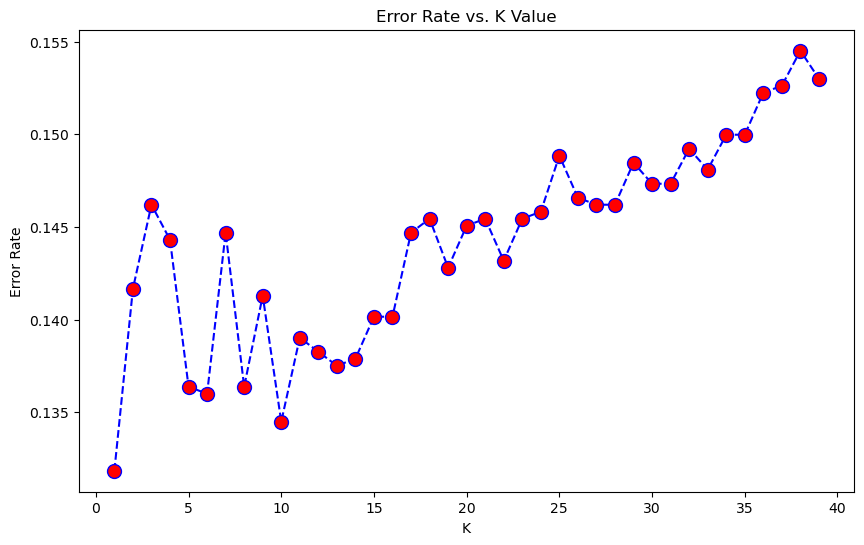

In [23]:
# plot the Error rate vs K Value graph
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [24]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[1141  184]
 [ 165 1157]]


              precision    recall  f1-score   support

         0.0       0.87      0.86      0.87      1325
         1.0       0.86      0.88      0.87      1322

    accuracy                           0.87      2647
   macro avg       0.87      0.87      0.87      2647
weighted avg       0.87      0.87      0.87      2647



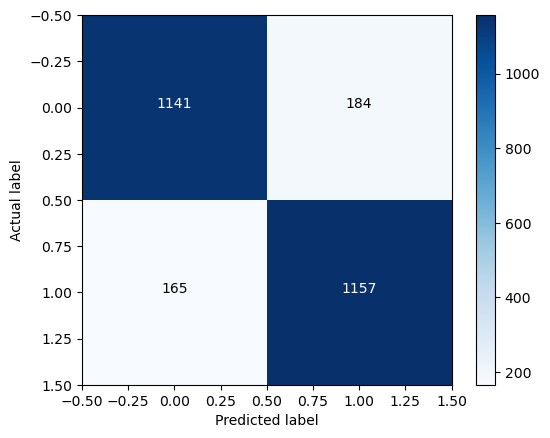

In [25]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


# Calculate confusion matrix
conf_mat = confusion_matrix(y_test,pred)

# Plot confusion matrix
plt.imshow(conf_mat, cmap='Blues', interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(set(y_test)))
# plt.xticks(tick_marks, ['Class 0', 'Class 1'], rotation=45)
# plt.yticks(tick_marks, ['Class 0', 'Class 1'])
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

# Add values to confusion matrix plot
thresh = conf_mat.max() / 2.
for i, j in np.ndindex(conf_mat.shape):
    plt.text(j, i, conf_mat[i, j],
             horizontalalignment="center",
             color="white" if conf_mat[i, j] > thresh else "black")

plt.show()
